# 🍽️ Restaurant Sentiment Analysis - Data Exploration

**Project:** Hospitality & Service - Enhancing Restaurant Experience  
**Author:** Akakinad  
**Date:** January 29, 2026  
**Objective:** Explore customer reviews to understand sentiment patterns and prepare data for machine learning

---

## Table of Contents
1. Setup & Data Loading
2. Initial Data Inspection
3. Data Quality Check
4. Sentiment Distribution Analysis
5. Review Text Analysis
6. Key Insights & Next Steps

---

## 1️⃣ Setup & Data Loading

Import necessary libraries and load the dataset.

In [1]:
# Import essential libraries
import pandas as pd
import numpy as np

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [3]:
# Load the restaurant reviews dataset
df = pd.read_csv('./data/raw/Restaurant_Reviews.tsv', 
                 delimiter='\t',
                 quoting=3)

print(f"✅ Dataset loaded successfully!")
print(f"📊 Shape: {df.shape[0]} rows × {df.shape[1]} columns")

✅ Dataset loaded successfully!
📊 Shape: 1000 rows × 2 columns


## 2️⃣ Initial Data Inspection

Let's examine the structure and content of our dataset.

In [4]:
# Display first 5 reviews
print("First 5 rows of the dataset:\n")
df.head()

First 5 rows of the dataset:



,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
# Check column names and data types
print("Column Information:")
print("=" * 50)
print(f"Columns: {df.columns.tolist()}")
print(f"\nData Types:\n{df.dtypes}")

Column Information:
Columns: ['Review', 'Liked']

Data Types:
Review      str
Liked     int64
dtype: object


In [6]:
# Get basic information about the dataset
print("Dataset Overview:")
print("=" * 50)
df.info()

Dataset Overview:
<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Review  1000 non-null   str  
 1   Liked   1000 non-null   int64
dtypes: int64(1), str(1)
memory usage: 15.8 KB


## 3️⃣ Data Quality Check

Verify data completeness and identify any issues.

In [7]:
# Check for missing values
print("Missing Values Check:")
print("=" * 50)
missing = df.isnull().sum()
print(missing)

if missing.sum() == 0:
    print("\n✅ Perfect! No missing values detected.")
else:
    print(f"\n⚠️ Warning: {missing.sum()} missing values found.")

Missing Values Check:
Review    0
Liked     0
dtype: int64

✅ Perfect! No missing values detected.


In [8]:
# Check for duplicate reviews
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

if duplicates == 0:
    print("✅ No duplicates found.")
else:
    print(f"⚠️ Found {duplicates} duplicate reviews.")

Duplicate rows: 4
⚠️ Found 4 duplicate reviews.


In [9]:
# Check unique values in 'Liked' column
print("Target Variable (Liked) Analysis:")
print("=" * 50)
print(f"Unique values: {df['Liked'].unique()}")
print(f"Value counts:\n{df['Liked'].value_counts()}")

Target Variable (Liked) Analysis:
Unique values: [1 0]
Value counts:
Liked
1    500
0    500
Name: count, dtype: int64


### 🧹 Data Cleaning

Remove duplicate reviews to ensure data quality.

In [10]:
# Remove duplicate reviews
print(f"Before: {len(df)} reviews")

df_clean = df.drop_duplicates()

print(f"After: {len(df_clean)} reviews")
print(f"✅ Removed {len(df) - len(df_clean)} duplicate reviews")

Before: 1000 reviews
After: 996 reviews
✅ Removed 4 duplicate reviews


In [11]:
# Verify the cleaned dataset
print("Cleaned Dataset Summary:")
print("=" * 50)
print(f"Total reviews: {len(df_clean)}")
print(f"Positive reviews: {df_clean['Liked'].sum()}")
print(f"Negative reviews: {(df_clean['Liked'] == 0).sum()}")

Cleaned Dataset Summary:
Total reviews: 996
Positive reviews: 499
Negative reviews: 497


## 4️⃣ Sentiment Distribution Analysis

Visualize the balance between positive and negative reviews.

In [12]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for professional-looking plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("✅ Visualization libraries imported!")

✅ Visualization libraries imported!


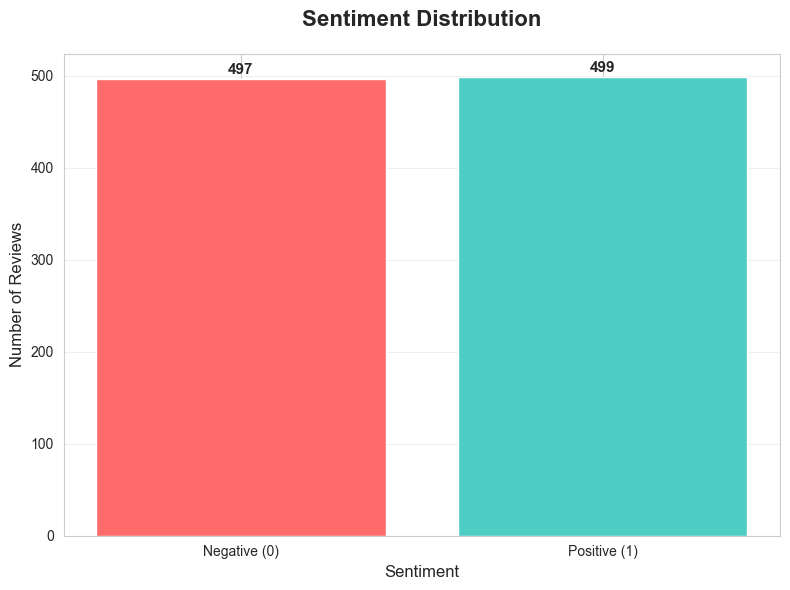

📊 Dataset is BALANCED: 50.1% positive


In [13]:
# Create sentiment distribution bar chart
plt.figure(figsize=(8, 6))

# Count plot
sentiment_counts = df_clean['Liked'].value_counts().sort_index()
colors = ['#FF6B6B', '#4ECDC4']  # Red for negative, Teal for positive

plt.bar(['Negative (0)', 'Positive (1)'], sentiment_counts.values, color=colors)
plt.title('Sentiment Distribution', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Add count labels on bars
for i, v in enumerate(sentiment_counts.values):
    plt.text(i, v + 5, str(v), ha='center', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

print(f"📊 Dataset is BALANCED: {sentiment_counts.values[1]/(sentiment_counts.sum())*100:.1f}% positive")

In [14]:
# Summary statistics
print("Dataset Summary:")
print("=" * 50)
print(f"Total Reviews: {len(df_clean)}")
print(f"Positive Reviews: {sentiment_counts[1]} ({sentiment_counts[1]/len(df_clean)*100:.1f}%)")
print(f"Negative Reviews: {sentiment_counts[0]} ({sentiment_counts[0]/len(df_clean)*100:.1f}%)")
print(f"\n✅ Dataset is well-balanced for binary classification!")

Dataset Summary:
Total Reviews: 996
Positive Reviews: 499 (50.1%)
Negative Reviews: 497 (49.9%)

✅ Dataset is well-balanced for binary classification!


In [16]:
# Save cleaned dataset for future use
df_clean.to_csv('./data/processed/reviews_cleaned.csv', index=False)

print("✅ Cleaned dataset saved to: data/processed/reviews_cleaned.csv")
print(f"📁 {len(df_clean)} reviews ready for analysis!")

✅ Cleaned dataset saved to: data/processed/reviews_cleaned.csv
📁 996 reviews ready for analysis!


## 5️⃣ Review Text Analysis

Analyze the characteristics of review text: length, word count, and patterns.

### 📏 Review Length Analysis

Compare the length of positive vs negative reviews.

In [17]:
# Calculate the length of each review (number of characters)
df_clean['review_length'] = df_clean['Review'].apply(len)

# Calculate word count for each review
df_clean['word_count'] = df_clean['Review'].apply(lambda x: len(x.split()))

print("✅ Length metrics calculated!")
print(f"\nFirst 5 reviews with their lengths:")
df_clean[['Review', 'review_length', 'word_count', 'Liked']].head()

✅ Length metrics calculated!

First 5 reviews with their lengths:


,Review,review_length,word_count,Liked
0,Wow... Loved this place.,24,4,1
1,Crust is not good.,18,4,0
2,Not tasty and the texture was just nasty.,41,8,0
3,Stopped by during the late May bank holiday of...,87,15,1
4,The selection on the menu was great and so wer...,59,12,1


In [18]:
# Compare statistics for positive vs negative reviews
print("Review Length Statistics by Sentiment:")
print("=" * 60)

# Group by sentiment
length_stats = df_clean.groupby('Liked')[['review_length', 'word_count']].agg(['mean', 'median', 'min', 'max'])

print("\nNegative Reviews (Liked = 0):")
print(f"  Avg characters: {length_stats.loc[0, ('review_length', 'mean')]:.1f}")
print(f"  Avg words: {length_stats.loc[0, ('word_count', 'mean')]:.1f}")

print("\nPositive Reviews (Liked = 1):")
print(f"  Avg characters: {length_stats.loc[1, ('review_length', 'mean')]:.1f}")
print(f"  Avg words: {length_stats.loc[1, ('word_count', 'mean')]:.1f}")

Review Length Statistics by Sentiment:

Negative Reviews (Liked = 0):
  Avg characters: 61.0
  Avg words: 11.5

Positive Reviews (Liked = 1):
  Avg characters: 56.0
  Avg words: 10.3


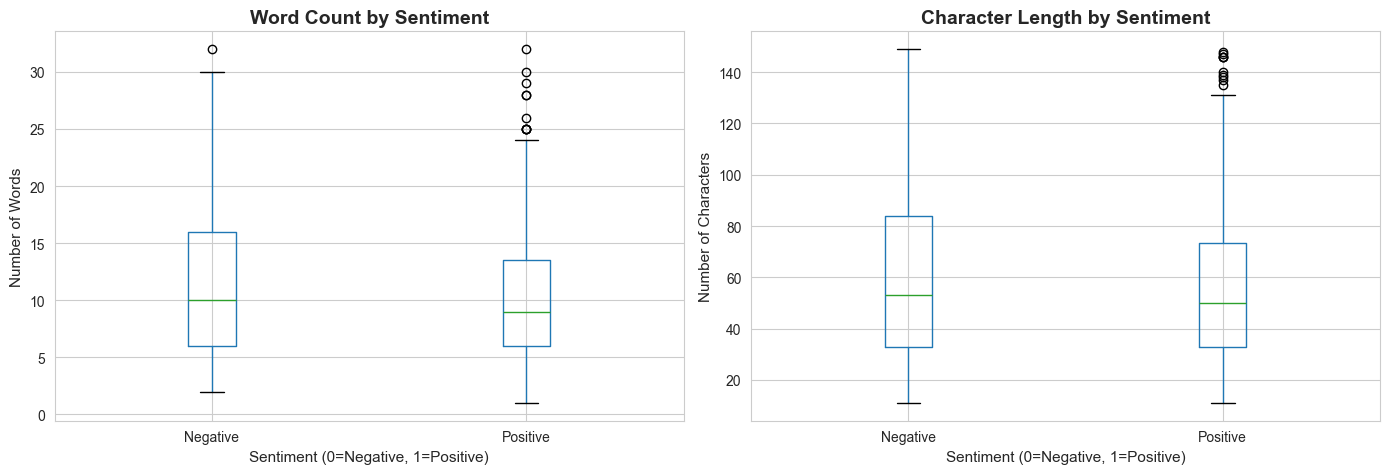

📊 Box plots show the distribution of review lengths


In [19]:
# Create box plots to compare length distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Word count comparison
df_clean.boxplot(column='word_count', by='Liked', ax=axes[0])
axes[0].set_title('Word Count by Sentiment', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sentiment (0=Negative, 1=Positive)', fontsize=11)
axes[0].set_ylabel('Number of Words', fontsize=11)
axes[0].set_xticklabels(['Negative', 'Positive'])

# Character length comparison
df_clean.boxplot(column='review_length', by='Liked', ax=axes[1])
axes[1].set_title('Character Length by Sentiment', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Sentiment (0=Negative, 1=Positive)', fontsize=11)
axes[1].set_ylabel('Number of Characters', fontsize=11)
axes[1].set_xticklabels(['Negative', 'Positive'])

plt.suptitle('')  # Remove default title
plt.tight_layout()
plt.show()

print("📊 Box plots show the distribution of review lengths")

### 🔤 Most Common Words Analysis

Identify frequently used words in positive vs negative reviews.

In [20]:
# Import text processing tools
from collections import Counter
import re

print("✅ Text processing tools imported!")

✅ Text processing tools imported!


In [21]:
# Function to extract all words from reviews
def get_all_words(reviews):
    """Extract and clean all words from a list of reviews"""
    all_words = []
    for review in reviews:
        # Convert to lowercase and extract words only
        words = re.findall(r'\b[a-z]+\b', review.lower())
        all_words.extend(words)
    return all_words

print("✅ Word extraction function created!")

✅ Word extraction function created!


In [22]:
# Separate positive and negative reviews
positive_reviews = df_clean[df_clean['Liked'] == 1]['Review']
negative_reviews = df_clean[df_clean['Liked'] == 0]['Review']

# Extract all words
positive_words = get_all_words(positive_reviews)
negative_words = get_all_words(negative_reviews)

print(f"✅ Words extracted!")
print(f"Positive reviews: {len(positive_words)} total words")
print(f"Negative reviews: {len(negative_words)} total words")

✅ Words extracted!
Positive reviews: 5186 total words
Negative reviews: 5825 total words


In [23]:
# Count word frequency
positive_counter = Counter(positive_words)
negative_counter = Counter(negative_words)

# Get top 15 most common words
top_positive = positive_counter.most_common(15)
top_negative = negative_counter.most_common(15)

print("Top 15 Words in POSITIVE Reviews:")
print("=" * 50)
for word, count in top_positive:
    print(f"{word:15} : {count}")

print("\n\nTop 15 Words in NEGATIVE Reviews:")
print("=" * 50)
for word, count in top_negative:
    print(f"{word:15} : {count}")

Top 15 Words in POSITIVE Reviews:
the             : 311
and             : 222
was             : 138
i               : 137
a               : 112
is              : 104
to              : 89
this            : 76
good            : 73
great           : 70
it              : 63
food            : 60
in              : 60
place           : 56
of              : 53


Top 15 Words in NEGATIVE Reviews:
the             : 273
i               : 217
and             : 171
was             : 156
to              : 131
a               : 125
not             : 97
it              : 90
t               : 77
of              : 74
is              : 67
for             : 67
this            : 65
food            : 65
we              : 53


In [24]:
# Import NLTK stopwords
import nltk
nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords

# Get English stopwords
stop_words = set(stopwords.words('english'))

print(f"✅ Loaded {len(stop_words)} common stopwords")
print(f"Examples: {list(stop_words)[:10]}")

✅ Loaded 198 common stopwords
Examples: ["he'll", 'why', "you're", 'should', 'shan', "isn't", 'its', 'between', "wouldn't", 'yours']


In [25]:
# Remove stopwords from word lists
positive_words_filtered = [word for word in positive_words if word not in stop_words]
negative_words_filtered = [word for word in negative_words if word not in stop_words]

# Count again
positive_counter_filtered = Counter(positive_words_filtered)
negative_counter_filtered = Counter(negative_words_filtered)

# Get top 15 MEANINGFUL words
top_positive_filtered = positive_counter_filtered.most_common(15)
top_negative_filtered = negative_counter_filtered.most_common(15)

print("Top 15 MEANINGFUL Words in POSITIVE Reviews:")
print("=" * 50)
for word, count in top_positive_filtered:
    print(f"{word:15} : {count}")

print("\n\nTop 15 MEANINGFUL Words in NEGATIVE Reviews:")
print("=" * 50)
for word, count in top_negative_filtered:
    print(f"{word:15} : {count}")

Top 15 MEANINGFUL Words in POSITIVE Reviews:
good            : 73
great           : 70
food            : 60
place           : 56
service         : 47
friendly        : 24
delicious       : 23
back            : 23
amazing         : 22
nice            : 22
time            : 22
really          : 22
best            : 22
also            : 18
go              : 18


Top 15 MEANINGFUL Words in NEGATIVE Reviews:
food            : 65
place           : 48
service         : 38
back            : 37
like            : 29
go              : 26
good            : 22
never           : 22
would           : 21
time            : 20
ever            : 19
minutes         : 19
bad             : 18
one             : 16
much            : 15


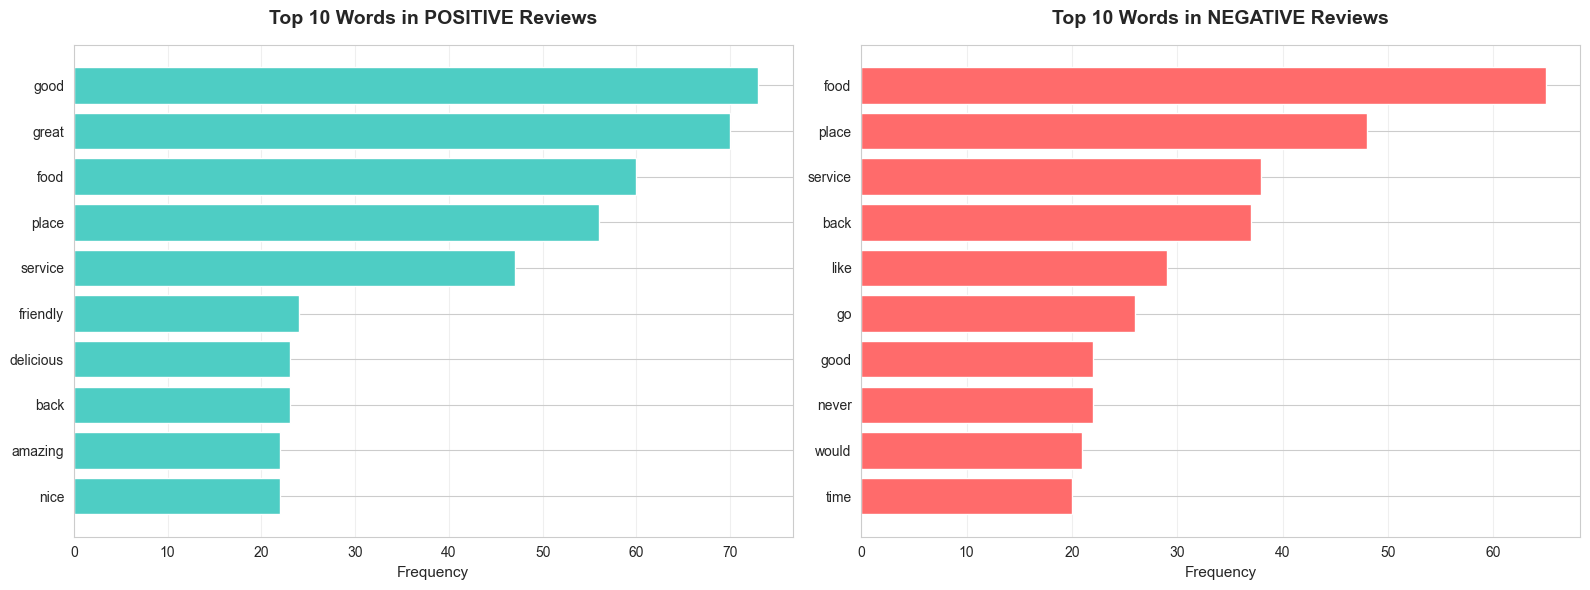

📊 Word frequency comparison complete!


In [26]:
# Create side-by-side comparison of top 10 words
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top 10 positive words
pos_words = [word for word, count in top_positive_filtered[:10]]
pos_counts = [count for word, count in top_positive_filtered[:10]]

axes[0].barh(pos_words, pos_counts, color='#4ECDC4')
axes[0].set_title('Top 10 Words in POSITIVE Reviews', fontsize=14, fontweight='bold', pad=15)
axes[0].set_xlabel('Frequency', fontsize=11)
axes[0].invert_yaxis()  # Highest at top
axes[0].grid(axis='x', alpha=0.3)

# Top 10 negative words
neg_words = [word for word, count in top_negative_filtered[:10]]
neg_counts = [count for word, count in top_negative_filtered[:10]]

axes[1].barh(neg_words, neg_counts, color='#FF6B6B')
axes[1].set_title('Top 10 Words in NEGATIVE Reviews', fontsize=14, fontweight='bold', pad=15)
axes[1].set_xlabel('Frequency', fontsize=11)
axes[1].invert_yaxis()  # Highest at top
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 Word frequency comparison complete!")

### ☁️ Word Cloud Visualization

Visual representation of word frequency - bigger words appear more often!

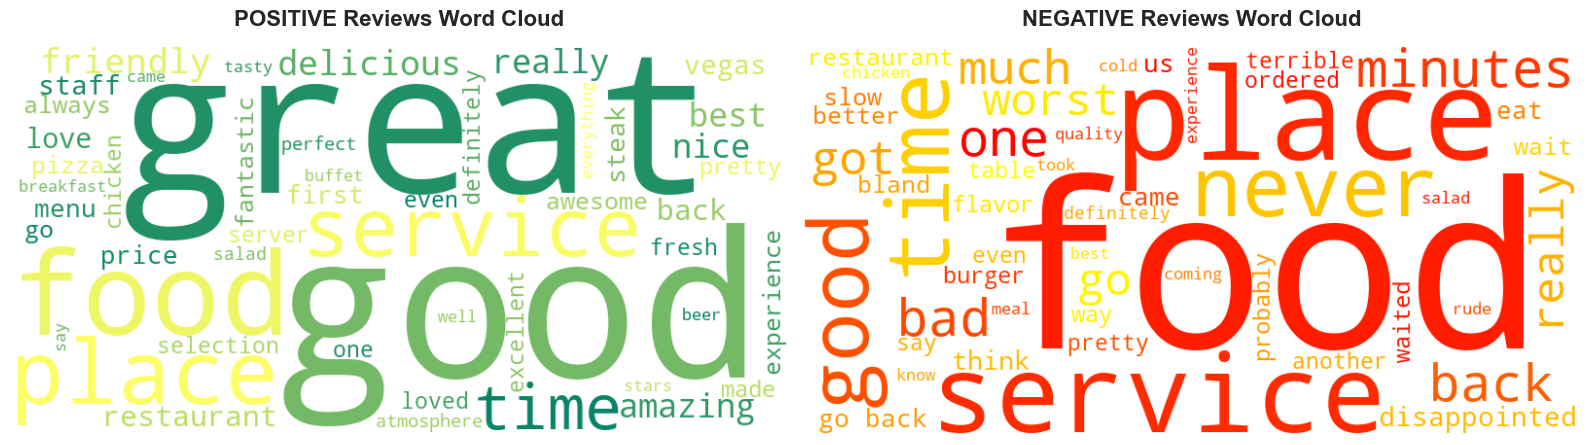

☁️ Word clouds generated successfully!


In [27]:
from wordcloud import WordCloud

# Create word clouds
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Positive word cloud
positive_text = ' '.join(positive_words_filtered)
wordcloud_positive = WordCloud(width=800, height=400, 
                                background_color='white',
                                colormap='summer',
                                max_words=50).generate(positive_text)

axes[0].imshow(wordcloud_positive, interpolation='bilinear')
axes[0].set_title('POSITIVE Reviews Word Cloud', fontsize=16, fontweight='bold', pad=15)
axes[0].axis('off')

# Negative word cloud
negative_text = ' '.join(negative_words_filtered)
wordcloud_negative = WordCloud(width=800, height=400,
                                background_color='white',
                                colormap='autumn',
                                max_words=50).generate(negative_text)

axes[1].imshow(wordcloud_negative, interpolation='bilinear')
axes[1].set_title('NEGATIVE Reviews Word Cloud', fontsize=16, fontweight='bold', pad=15)
axes[1].axis('off')

plt.tight_layout()
plt.show()

print("☁️ Word clouds generated successfully!")

## 6️⃣ Key Findings Summary

Summary of insights from exploratory data analysis.

### 📊 Main Discoveries

**Dataset Characteristics:**
- 996 restaurant reviews (after cleaning)
- Perfectly balanced: 50.1% positive, 49.9% negative
- Average review length: 10-11 words

**Text Patterns:**
- Negative reviews are slightly longer (11.5 vs 10.3 words)
- Complainers write more to explain issues

**Sentiment Indicators:**

**Positive Words:** good, great, delicious, amazing, friendly, nice, best  
**Negative Words:** never, bad, worst, terrible, minutes (wait time)

**Business Insights:**
1. **Food quality** is most discussed topic in both sentiments
2. **Service** and **place** are key decision factors
3. **Wait time** ("minutes") is a major complaint source
4. Positive reviewers focus on overall experience
5. Negative reviewers detail specific problems

---

### 🎯 Next Steps
- Text preprocessing (cleaning, tokenization)
- Feature engineering (TF-IDF)
- Model training and evaluation

In [29]:
# Save dataset with added length features
df_clean.to_csv('./data/processed/reviews_with_features.csv', index=False)

print("✅ Dataset with text features saved!")
print(f"📁 Location: data/processed/reviews_with_features.csv")
print(f"📊 Columns: {df_clean.columns.tolist()}")

✅ Dataset with text features saved!
📁 Location: data/processed/reviews_with_features.csv
📊 Columns: ['Review', 'Liked', 'review_length', 'word_count']
